<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import math

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://placekitten.com/800/571","https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg","https://media.istockphoto.com/photos/outdoor-close-up-portrait-of-5-o-year-old-woman-resting-by-the-lake-picture-id1318528755?b=1&k=20&m=1318528755&s=170667a&w=0&h=zbk7Ul4rZXA0pr5IKf7eMck6HeaA2EK4vPkgD75nx8o=","https://images.newindianexpress.com/uploads/user/imagelibrary/2020/10/29/w1200X800/SHAPES_OF.jpg"]  # Random image of a kitten

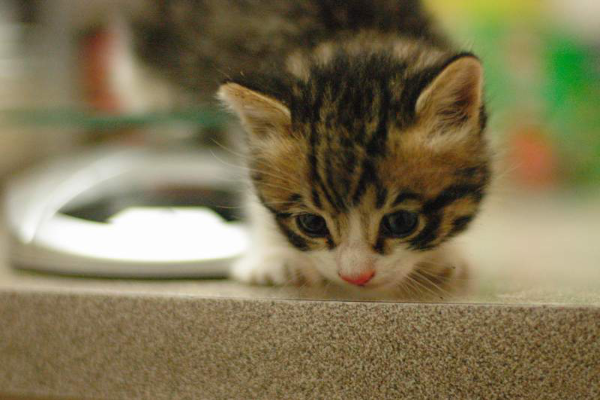

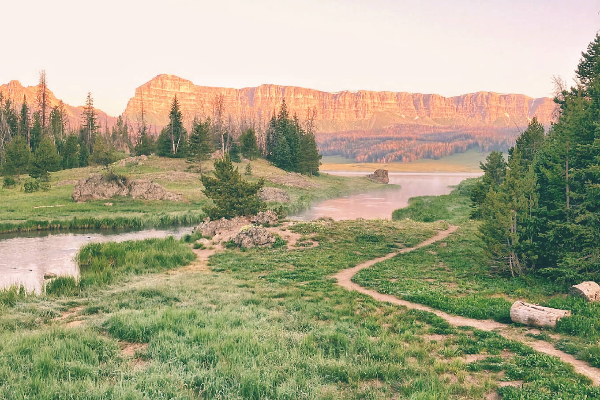

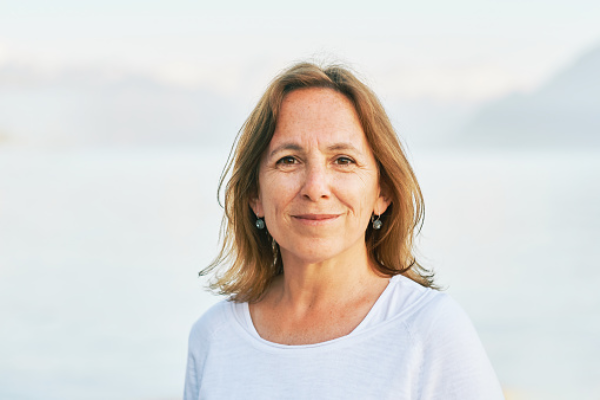

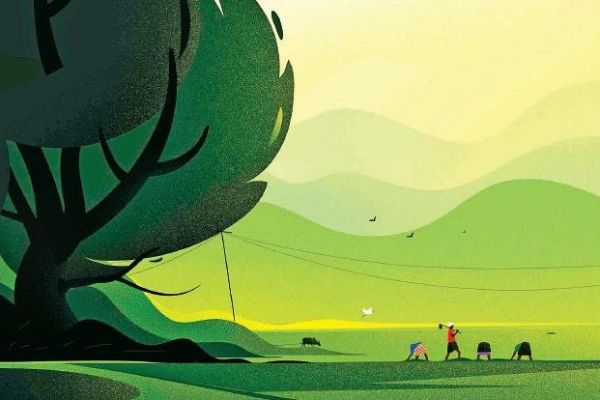

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (600, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    return gray

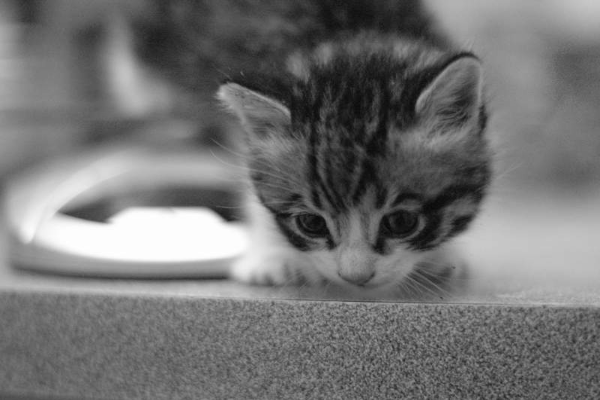

In [ ]:
gray = grayscale(images[0])

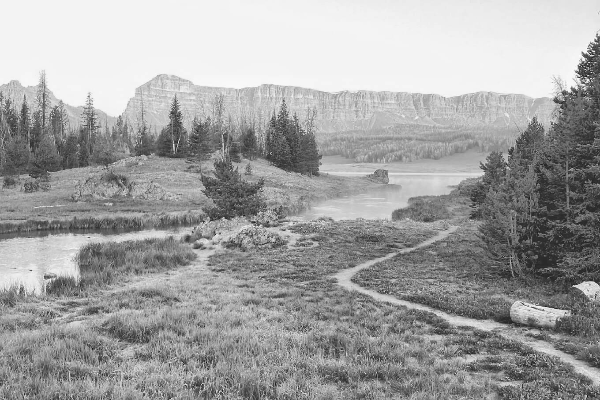

In [ ]:
gray2 = grayscale(images[1])

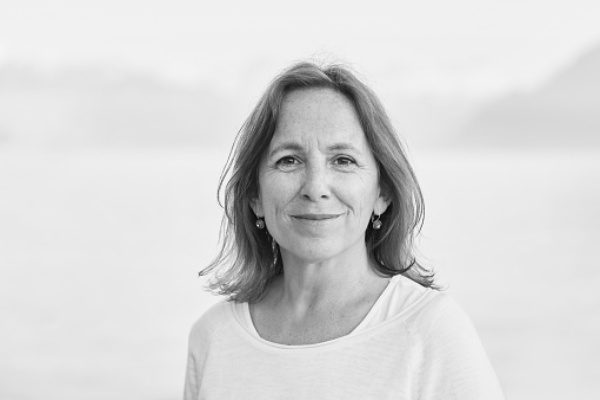

In [ ]:
gray_woman = grayscale(images[2])

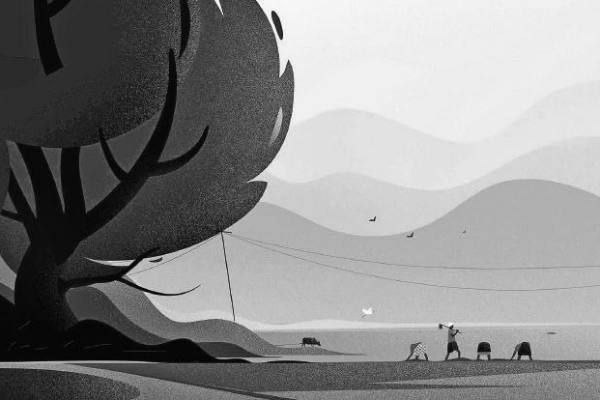

In [ ]:
gray3 = grayscale(images[3])

# a. Detect edges using Roberts, Prewitts and Sobel

## Roberts

In [ ]:
gx_kr = np.array([[1,0], [0, -1]])
gy_kr = np.array([[0,1], [-1, 0]])

In [ ]:
def robert(image):
  image_2 = image.copy()
  shape = image.shape
  R = shape[0]
  C = shape[1]

  for i in range(0,R-1):
    for j in range(0,C-1):
      a = np.array([[image[i][j] , image[i+1][j]] , [image[i+1][j+1] , image[i][j+1]]])
      gx = np.sum(a*gx_kr)
      gy = np.sum(a*gy_kr)
      g = math.sqrt((gx*gx) + (gy*gy))
      image_2[i][j] = g

  cv2_imshow(image_2)
  return image_2


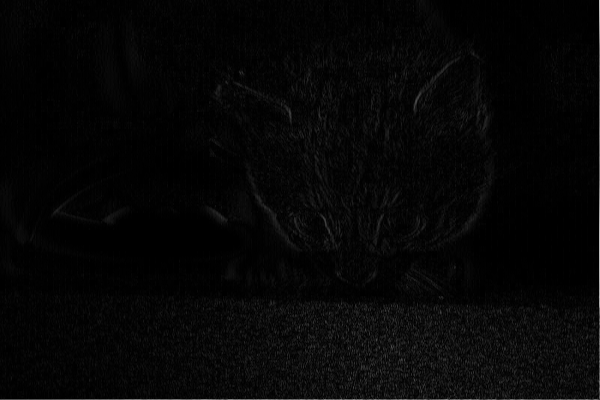

In [ ]:
robert_gray = robert(gray)

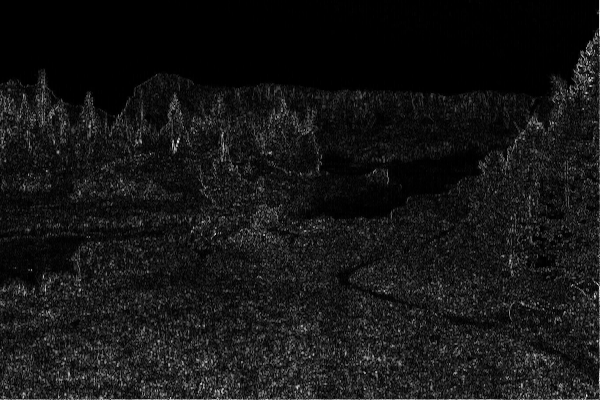

In [ ]:
robert_gray2 = robert(gray2)

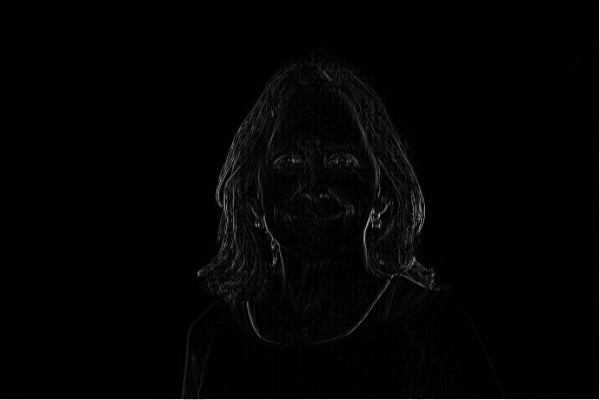

In [ ]:
robert_gray_woman = robert(gray_woman)

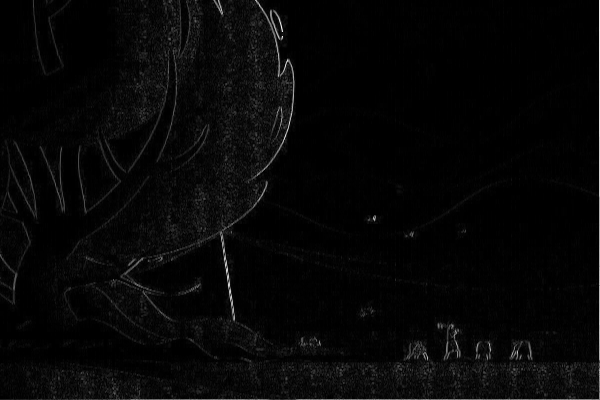

In [ ]:
robert_gray3 = robert(gray3)

## Sobels

In [ ]:
gx_k = np.array([[-1,0,1], [-2, 0, 2], [-1,0,1]])
gy_k = np.array([[1,2,1], [0, 0, 0], [-1,-2,-1]])

In [ ]:
def sobel(image):
  image_2 = image.copy()
  shape = image.shape
  R = shape[0]
  C = shape[1]

  for i in range(1,R-1):
    for j in range(1,C-1):
      a = np.array([[image[i-1][j-1] , image[i+1][j-1] , image[i-1][j+1]] , [image[i+1][j+1] , image[i][j-1] , image[i][j+1]] , [image[i-1][j] , image[i+1][j] ,image[i][j]]])
      gx = np.sum(a*gx_k)
      gy =np.sum(a*gy_k)
      g = math.sqrt((gx*gx) + (gy*gy))
      image_2[i][j] = g
  cv2_imshow(image_2)
  return image_2


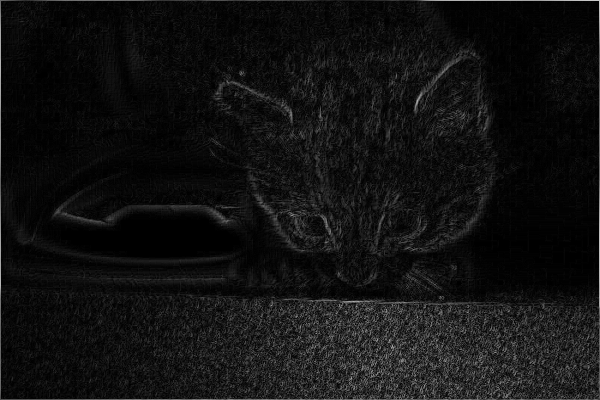

In [ ]:
sobel_gray = sobel(gray)

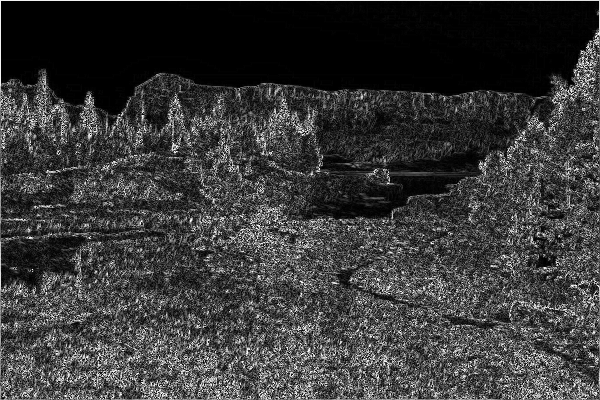

In [ ]:
sobel_gray2 = sobel(gray2)

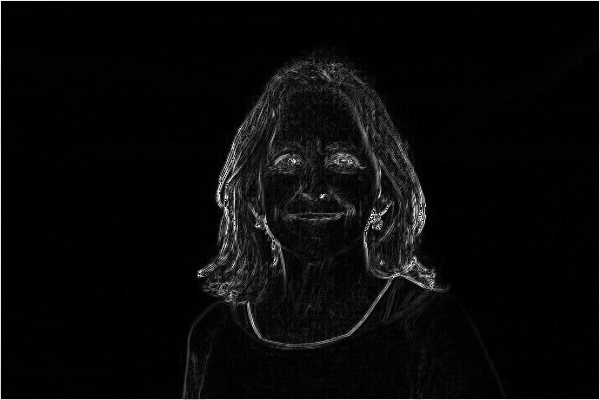

In [ ]:
sobel_gray_woman = sobel(gray_woman)

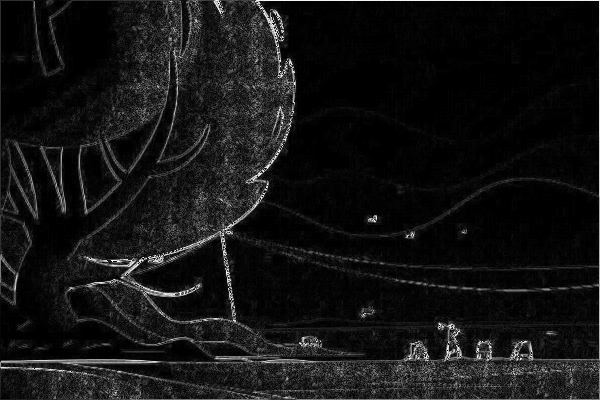

In [ ]:
sobel_gray3 = sobel(gray3)

## Prewitts


In [ ]:
gx_k = np.array([[-1,-1,1], [0, 0, 0], [1,1,1]])
gy_k = np.array([[-1,-1,-1], [0, 0, 0], [1,1,1]])

In [ ]:
def prewitt(image):
  image_2 = image.copy()
  shape = image.shape
  R = shape[0]
  C = shape[1]

  for i in range(1,R-1):
    for j in range(1,C-1):
      a = np.array([[image[i-1][j-1] , image[i+1][j-1] , image[i-1][j+1]] , [image[i+1][j+1] , image[i][j-1] , image[i][j+1]] , [image[i-1][j] , image[i+1][j] ,image[i][j]]])
      gx = np.sum(a*gx_k)
      gy =np.sum(a*gy_k)
      g = math.sqrt((gx*gx) + (gy*gy))
      image_2[i][j] = g
  cv2_imshow(image_2)
  return image_2


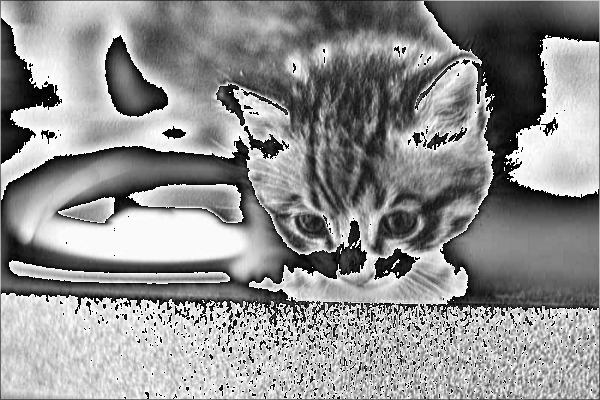

In [ ]:
prewitt_gray= prewitt(gray)

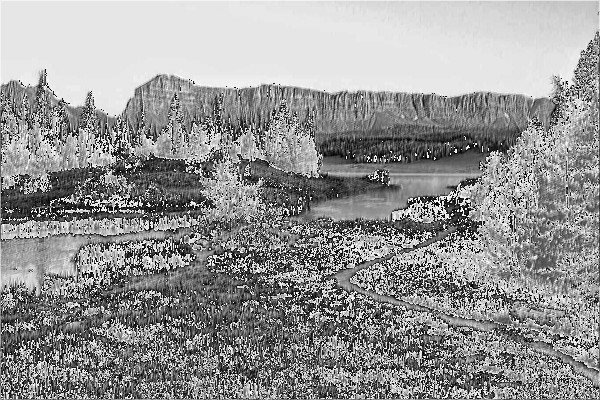

In [ ]:
prewitt_gray2 = prewitt(gray2)

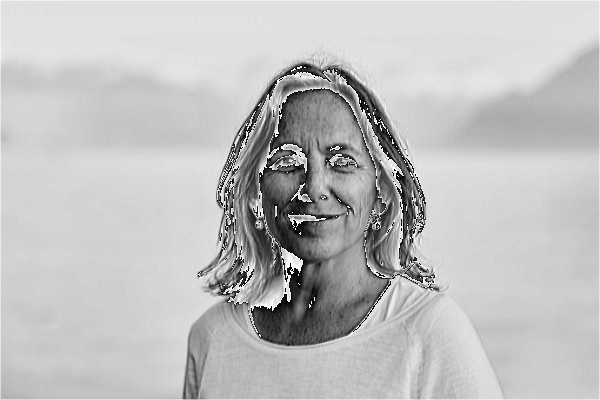

In [ ]:
prewitt_gray_woman = prewitt(gray_woman)

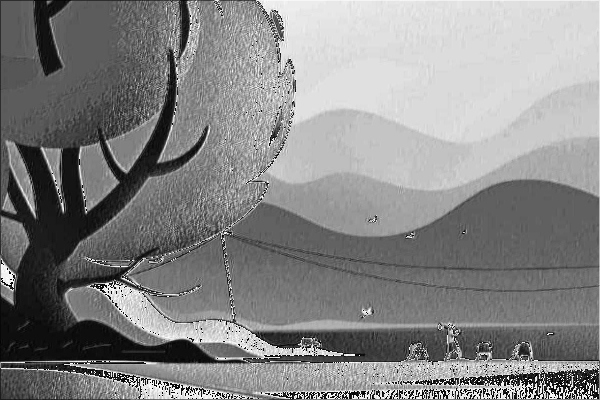

In [ ]:
prewitt_gray3 = prewitt(gray3)

## b. Subtract the edges from each of the methods from the input grayscale

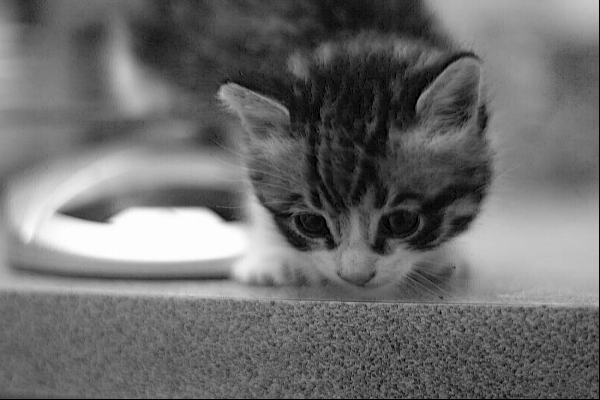

In [ ]:
robert_edges_gray = cv2.subtract(gray, robert_gray)
cv2_imshow(robert_edges_gray)

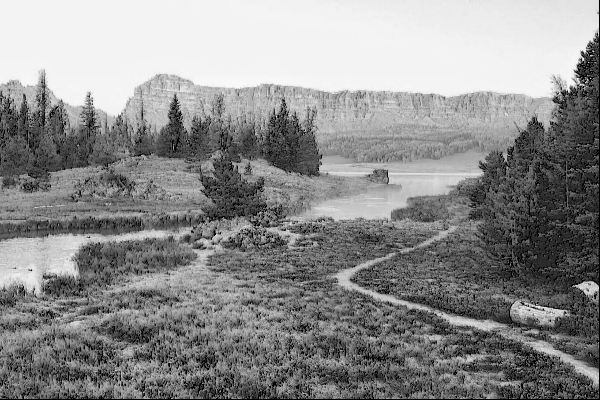

In [ ]:
robert_edges_gray2 = cv2.subtract(gray2, robert_gray2)
cv2_imshow(robert_edges_gray2)

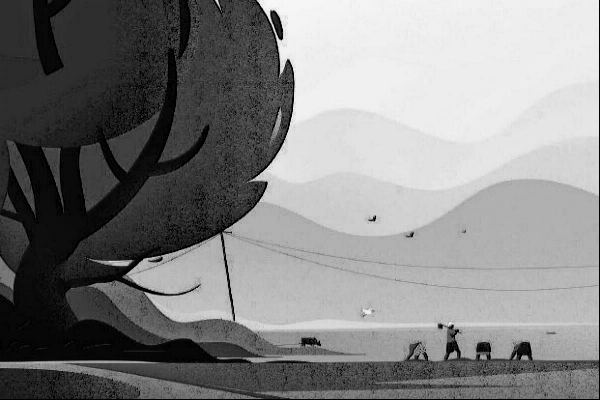

In [ ]:
robert_edges_gray3 = cv2.subtract(gray3, robert_gray3)
cv2_imshow(robert_edges_gray3)

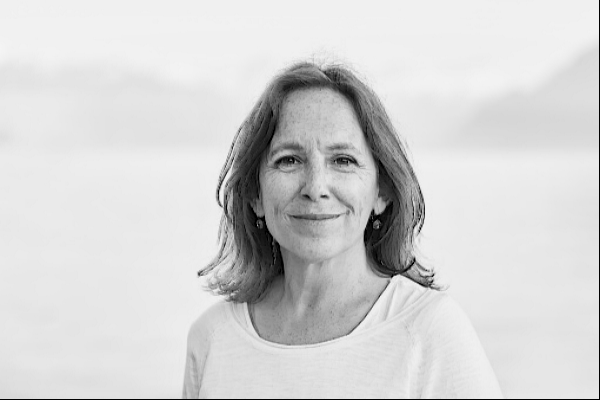

In [ ]:
robert_edges_gray_woman = cv2.subtract(gray_woman, robert_gray_woman)
cv2_imshow(robert_edges_gray_woman)

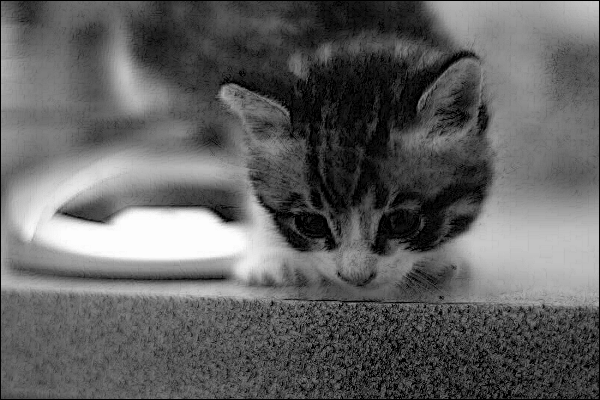

In [ ]:
sobel_edges_gray = cv2.subtract(gray, sobel_gray)
cv2_imshow(sobel_edges_gray)

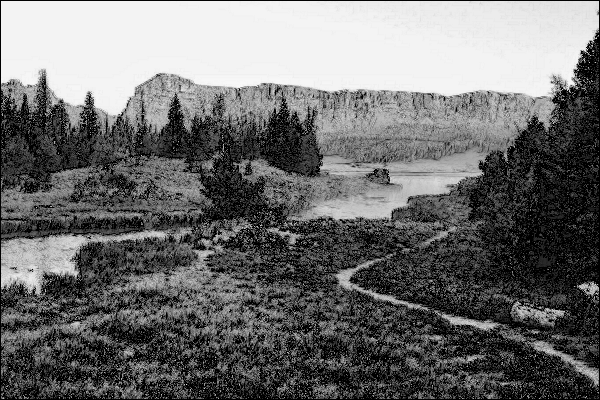

In [ ]:
sobel_edges_gray2 = cv2.subtract(gray2, sobel_gray2)
cv2_imshow(sobel_edges_gray2)

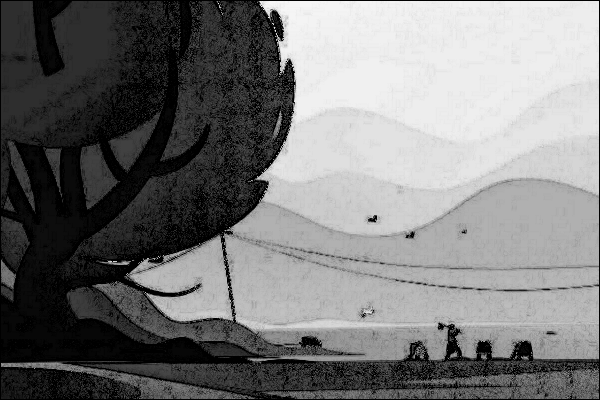

In [ ]:
sobel_edges_gray3 = cv2.subtract(gray3, sobel_gray3)
cv2_imshow(sobel_edges_gray3)

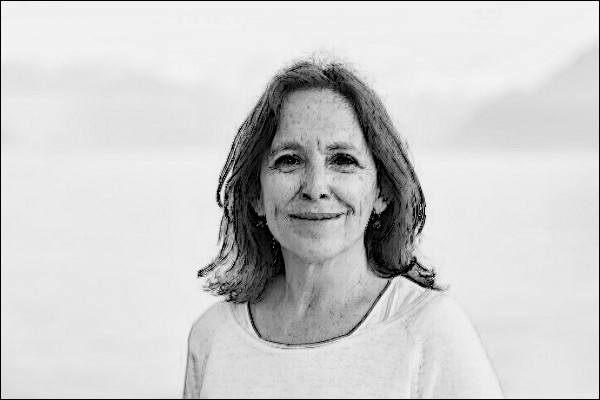

In [ ]:
sobel_edges_gray_woman = cv2.subtract(gray_woman, sobel_gray_woman)
cv2_imshow(sobel_edges_gray_woman)

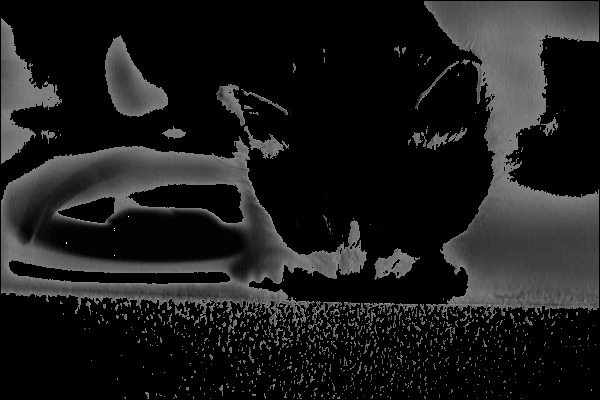

In [ ]:
prewitt_edges_gray = cv2.subtract(gray, prewitt_gray)
cv2_imshow(prewitt_edges_gray)

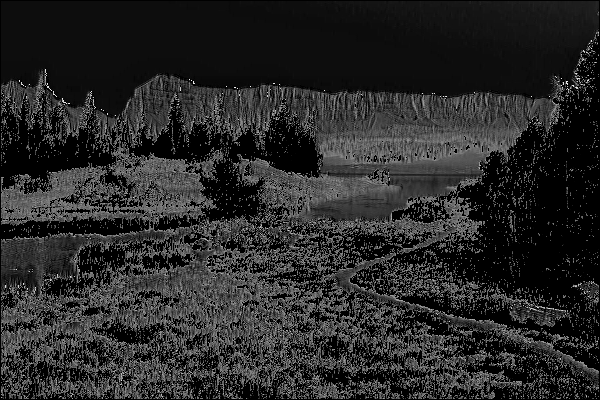

In [ ]:
prewitt_edges_gray2 = cv2.subtract(gray2, prewitt_gray2)
cv2_imshow(prewitt_edges_gray2)

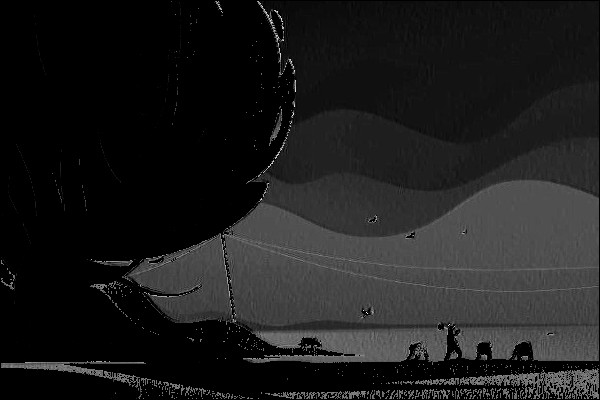

In [ ]:
prewitt_edges_gray3 = cv2.subtract(gray3, prewitt_gray3)
cv2_imshow(prewitt_edges_gray3)

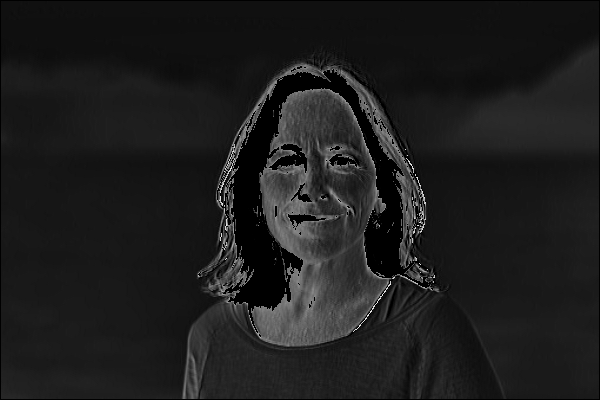

In [ ]:
prewitt_edges_gray_woman = cv2.subtract(gray_woman, prewitt_gray_woman)
cv2_imshow(prewitt_edges_gray_woman)

#c. Record the inference as which from step 3.1.b yields good quality image

Prewitt's operator clearly shows the edges of the images. Robert's operator leaves the images mostly unchanged. Sobel's operator darkens the edges in the images.